Setup

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import nltk
import string
import re
from nltk import word_tokenize, FreqDist,regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
from sklearn.cluster import AgglomerativeClustering, KMeans, AffinityPropagation
from sklearn.cluster import DBSCAN, OPTICS,MeanShift
from scipy.cluster.hierarchy import dendrogram,linkage

In [5]:
from bs4 import BeautifulSoup as bs
from itertools import takewhile
import requests
import json

In [18]:
%run Functionality.py

EDA

Stock Price Correlations

Dataframes for Correlations of Daily Changes (Absolute & Relative to Benchmark)

In [7]:
daily_prices,abs_data,rel_data=collect_market_data(Universe.index)

/Users/george/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'FYBR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


Quick Look @ Correlations Between Daily Changes & Daily Changes relative to the S&P.

In [8]:
abs_data[1]

Symbols,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,USM,SHEN,MSTR,W,OSTK,MELI,CVNA,MVIS,SPSC,FYBR
Symbols,,,,,,,,,,,,,,,,,,,,,
ATEN,1.000000,0.228074,0.294453,0.183571,0.552366,0.230313,0.318568,0.242374,0.202727,0.186590,...,0.201341,0.187498,0.205225,0.215751,0.218393,0.271375,0.242476,0.084423,0.292039,NaN
ATVI,0.228074,1.000000,0.489479,0.298038,-0.137142,0.333179,0.299174,0.411587,0.114690,0.151508,...,0.174945,0.204833,0.213068,0.269723,0.230100,0.310896,0.261769,0.071010,0.290542,NaN
ADBE,0.294453,0.489479,1.000000,0.381599,0.332528,0.415062,0.420495,0.529865,0.207791,0.231628,...,0.284027,0.339378,0.363663,0.353387,0.255644,0.464107,0.375462,0.121766,0.382263,NaN
AMD,0.183571,0.298038,0.381599,1.000000,-0.460263,0.274355,0.316574,0.314807,0.132095,0.185330,...,0.214464,0.219801,0.236506,0.229131,0.187622,0.297483,0.340085,0.095615,0.225735,NaN
ABNB,0.552366,-0.137142,0.332528,-0.460263,1.000000,0.325164,-0.045542,-0.029827,0.572100,-0.409683,...,-0.597258,-0.661259,0.065602,0.086365,0.121211,0.079013,0.454475,0.017205,0.413095,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MELI,0.271375,0.310896,0.464107,0.297483,0.079013,0.324987,0.318908,0.396786,0.157862,0.237183,...,0.220234,0.249454,0.283266,0.316481,0.239300,1.000000,0.344561,0.093959,0.301031,NaN
CVNA,0.242476,0.261769,0.375462,0.340085,0.454475,0.235953,0.298186,0.371150,0.138969,0.171762,...,0.129326,0.180834,0.217842,0.424374,0.196524,0.344561,1.000000,0.095266,0.321038,NaN
MVIS,0.084423,0.071010,0.121766,0.095615,0.017205,0.104998,0.073593,0.107802,0.053244,0.078577,...,0.041932,0.081902,0.079626,0.137012,0.111121,0.093959,0.095266,1.000000,0.092242,NaN


In [9]:
rel_data[0]

Symbols,ATEN,ATVI,ADBE,AMD,ABNB,AKAM,ATUS,AMZN,AMC,AMCX,...,USM,SHEN,MSTR,W,OSTK,MELI,CVNA,MVIS,SPSC,FYBR
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,NaN,-0.004884,0.005254,0.024137,NaN,0.014402,NaN,0.012130,NaN,NaN,...,-0.002704,0.022855,0.022615,NaN,-0.004640,0.040756,NaN,0.053201,-0.025872,NaN
2011-01-04,NaN,0.002112,0.008344,0.036732,NaN,-0.021895,NaN,0.005601,NaN,NaN,...,0.000916,-0.027081,0.008442,NaN,-0.005920,0.008873,NaN,0.087172,-0.005110,NaN
2011-01-05,NaN,-0.024161,0.017525,0.010956,NaN,0.031268,NaN,0.008019,NaN,NaN,...,-0.001631,-0.005538,-0.000288,NaN,0.014422,0.015802,NaN,0.027551,0.006628,NaN
2011-01-06,NaN,-0.000318,0.003675,-0.022568,NaN,-0.006065,NaN,-0.006201,NaN,NaN,...,-0.008764,-0.004788,0.002011,NaN,-0.002642,0.035822,NaN,-0.065445,-0.008740,NaN
2011-01-07,NaN,-0.011206,-0.005283,0.017955,NaN,0.006798,NaN,-0.000146,NaN,NaN,...,-0.007161,-0.016892,-0.000392,NaN,-0.040645,-0.007412,NaN,0.021168,-0.005261,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,-0.029930,0.004777,0.002400,-0.000697,-0.023599,0.000200,-0.006028,-0.007486,-0.023068,-0.027544,...,0.006231,0.001532,-0.046748,-0.022245,-0.028614,0.008721,0.013908,-0.018574,-0.006699,NaN
2020-12-28,0.004330,-0.003555,-0.010543,-0.011010,-0.046439,-0.010398,0.015979,0.026349,-0.056531,0.029844,...,0.004286,0.000448,0.138173,-0.066471,-0.104388,-0.024552,-0.093248,0.015705,-0.026852,NaN
2020-12-29,-0.039398,0.001571,0.008561,-0.008471,0.008939,-0.003086,0.028771,0.013811,-0.039614,0.022403,...,-0.008639,-0.006178,-0.008394,-0.018174,0.006319,0.008100,-0.001669,-0.055895,0.001766,NaN


Look @ Some Heatmaps of Correlations

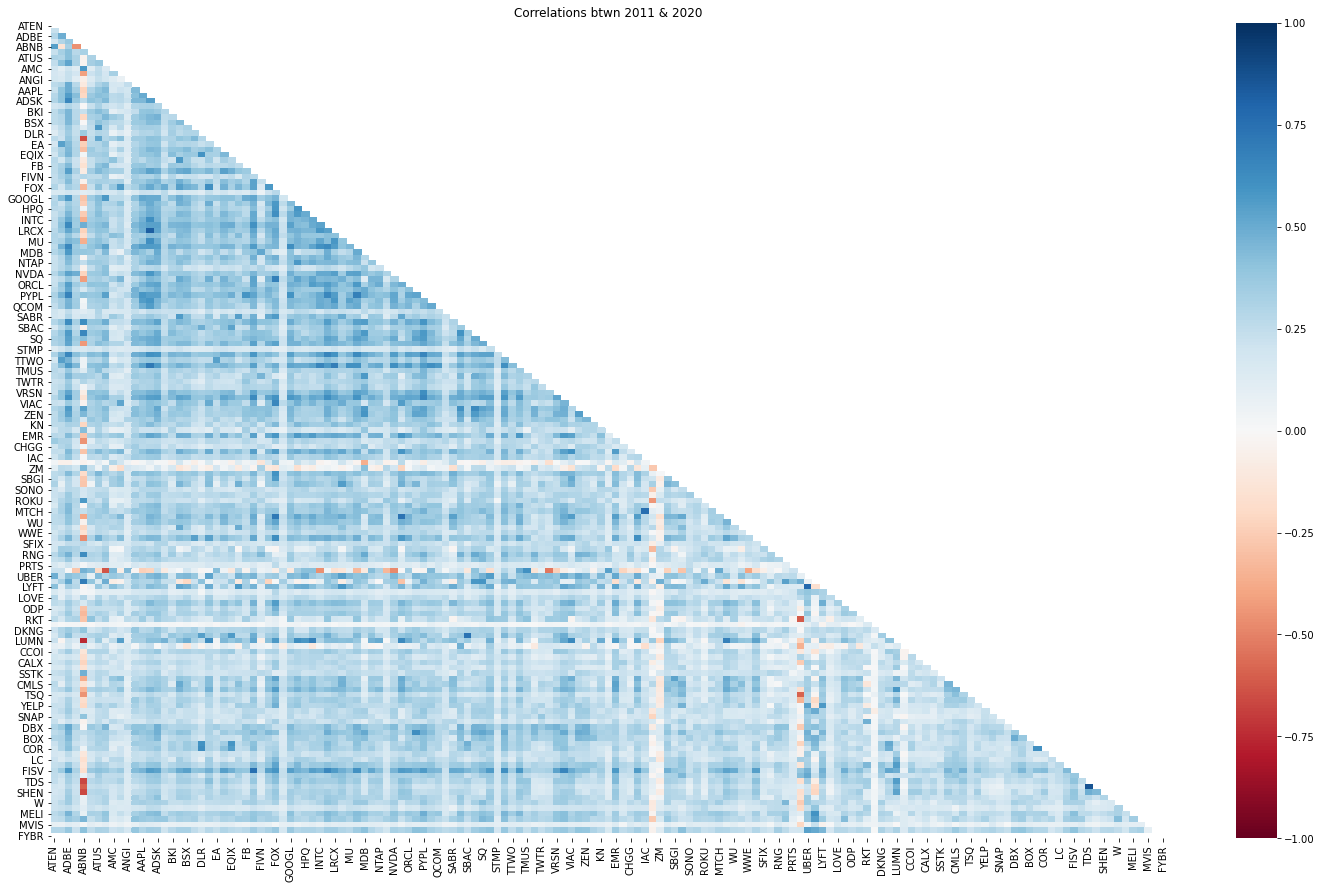

In [10]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Correlations btwn 2011 & 2020')
mtrx=abs_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
ax.set_xlabel(None)
ax.set_ylabel(None)
fig.savefig(image_path+'Corr Matrix.pdf',
            orientation='landscape',
            pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

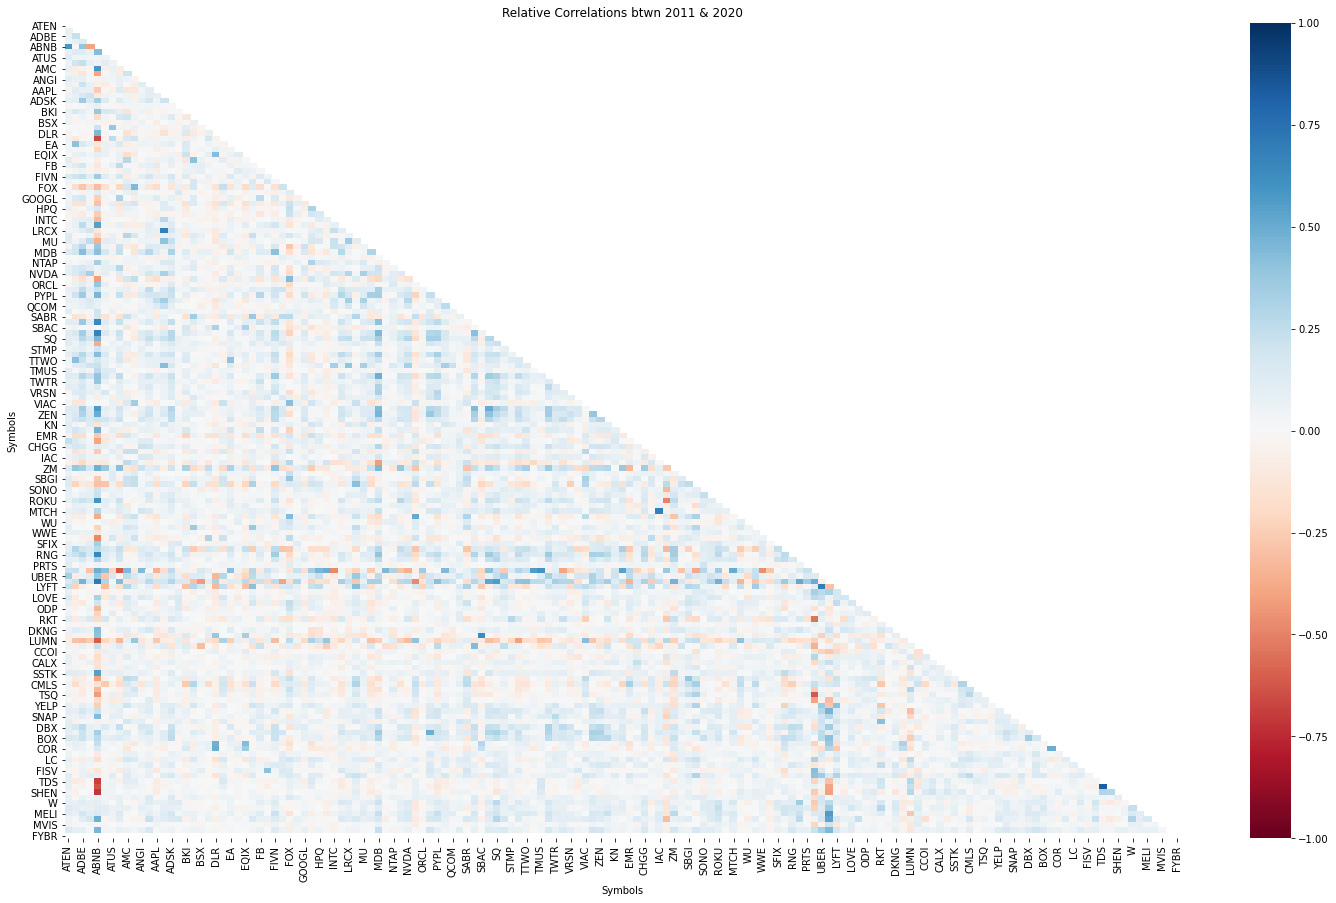

In [11]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.set_title('Relative Correlations btwn 2011 & 2020')
mtrx=rel_data[1]
mask = np.zeros_like(mtrx)
mask[np.triu_indices_from(mtrx)] = True
sns.heatmap(mtrx,vmin=-1,vmax=1,cmap='RdBu',ax=ax,mask=mask);
fig.savefig(image_path+'Corr Matrix_Relative.pdf',
            orientation='landscape',pad_inches=0.0,bbox_inches='tight',
            format='pdf'
           )

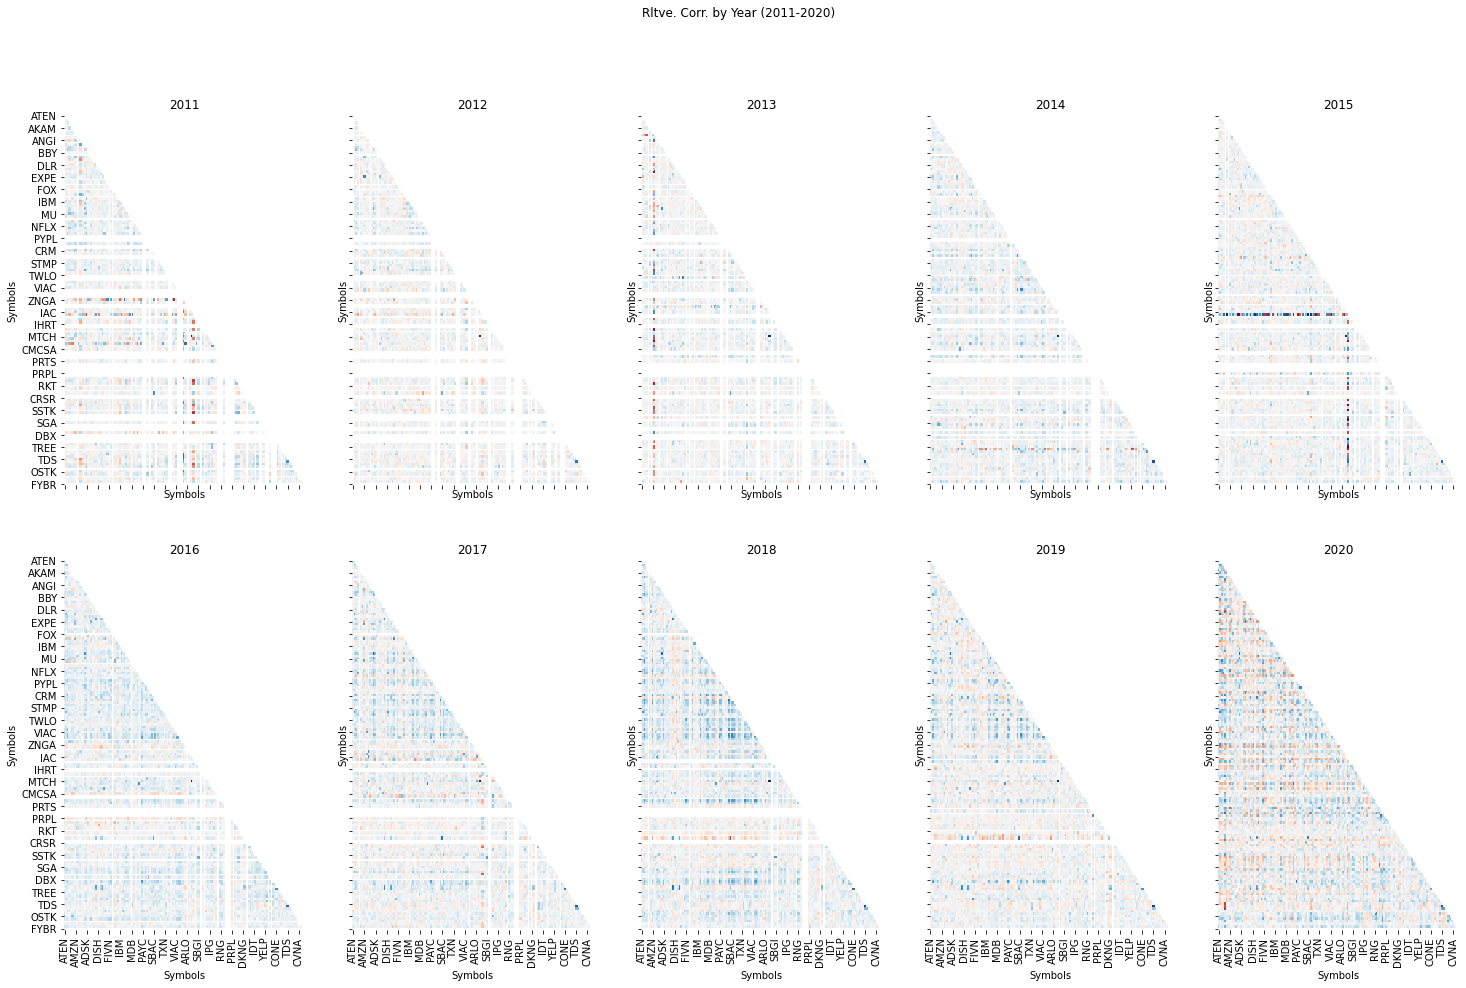

In [12]:
fig,ax=plt.subplots(ncols=5,nrows=2,figsize=(25,15),sharex=True,sharey=True,)
fig.suptitle('Rltve. Corr. by Year (2011-2020)')
axes=ax.reshape(-1)
i=0
for y in coverage:
    a=axes[i]
    a.set_title(y)
    corr_mat=rel_data[2].xs(y+'-12-31')
    mask = np.zeros_like(corr_mat)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,ax=a,vmin=-1,vmax=1,cbar=False,cmap='RdBu')
    i+=1
fig.savefig(image_path+'Annual Corr Matrices_Relative.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Given the number of time series in this dataset, it is tough to make any inferences with this visualization.  Let's look @ a different visualization technique...

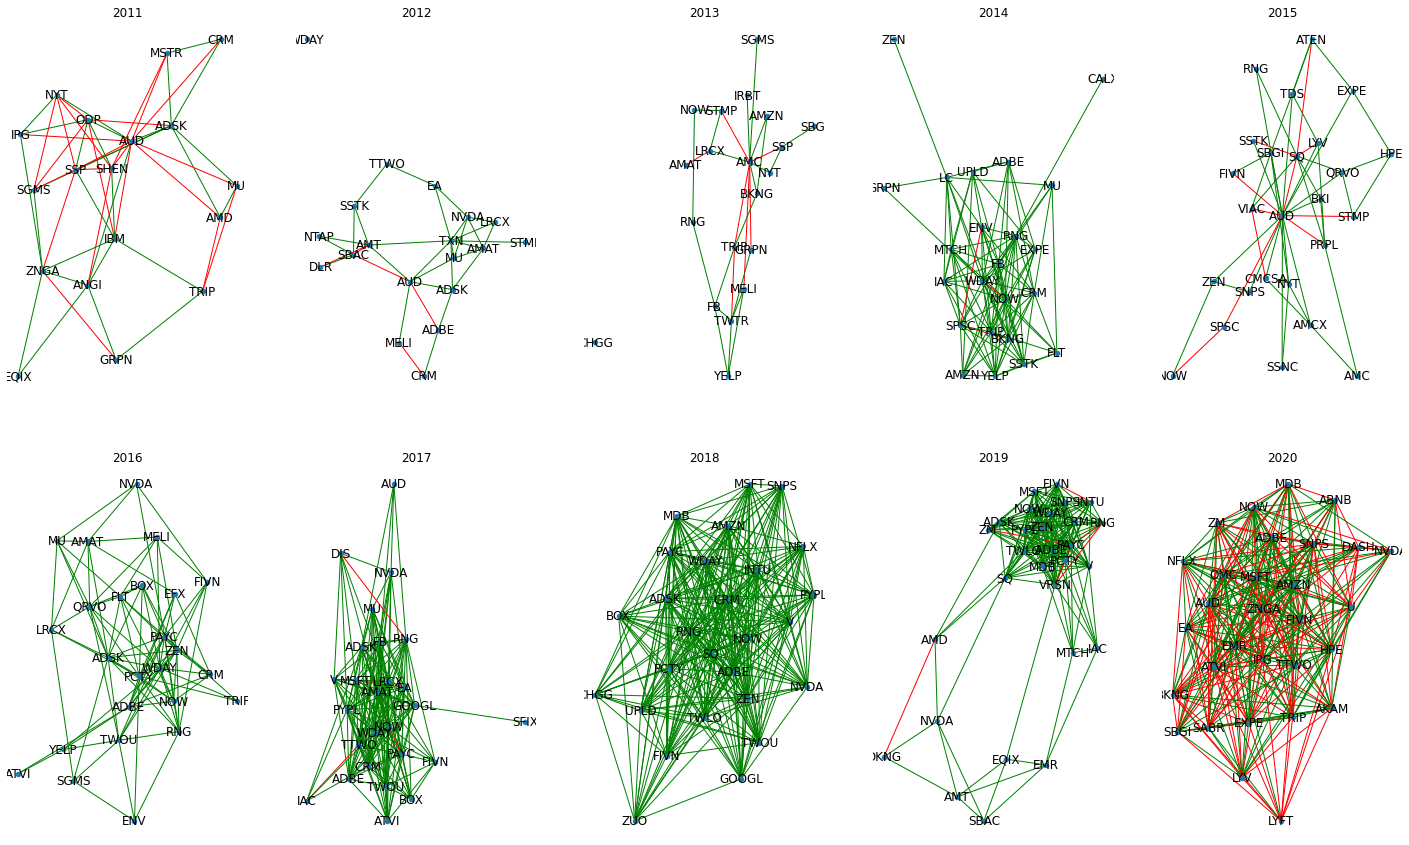

In [13]:
fig,axes=plt.subplots(ncols=5,nrows=2,figsize=(25,15))
axes=axes.reshape(-1)
matrix=rel_data[2]
i=0
for yr in coverage:
    Sigma=matrix.xs(yr+'-12-31')
    Tops=filter_decile(Sigma,0.8)
    G=graphx.Graph()
    G.add_nodes_from(Tops.index)
    colors=[]
    a=axes[i]
    a.set_title(yr)
    for tick_a in G.nodes:
        for tick_b in G.nodes:
            p=Sigma[tick_a][tick_b]
            if((tick_a!=tick_b) and abs(p)>0.25):
                clr='green' if p>0 else 'red'
                colors.append(clr)
                G.add_edge(tick_a,tick_b,color=clr,weight=abs(p))
            else:
                pass
                #print(tick_a,tick_b)
    graphx.draw(G,with_labels=True,edge_color=colors,node_size=20,ax=a)
    i+=1
fig.savefig(image_path+'Annual Universe Structure.pdf',
            orientation='landscape',
            pad_inches=0.0,
            bbox_inches='tight',
            format='pdf'
           )

Moving on to the text...

In [14]:
for tick in Filed.index:
    visualize_stock(tick);

In [15]:
for yr in ['2016','2017','2018','2019','2020']:
    entire_year(yr)

Let's look at some simple clustering algorithms on the 2020 subset.  This will provide some insight into the different options we have for clustering.

In [16]:
corpus=collect_texts_year('2020')

Create some feature engineers with different Vectorizor parameters (all TfIDF).

In [19]:
parms={'max_df':0.99,'max_features':10,'min_df':0.01}
engineer_10=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':25,'min_df':0.01}
engineer_25=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':50,'min_df':0.01}
engineer_50=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':100,'min_df':0.01}
engineer_100=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':200,'min_df':0.01}
engineer_200=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':500,'min_df':0.01}
engineer_500=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer_1000=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':1500,'min_df':0.01}
engineer_1500=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':2000,'min_df':0.01}
engineer_2000=create_extractor(corpus.values(),parms)
parms={'max_df':0.99,'max_features':5000,'min_df':0.01}
engineer_5000=create_extractor(corpus.values(),parms)
engineers={
        '10':engineer_10,
        '25':engineer_25,
        '50':engineer_50,
        '100':engineer_100,
        '200':engineer_200,
        '500':engineer_500,
        '1000':engineer_1000,
        '1500':engineer_1500,
        '2000':engineer_2000,
        '5000':engineer_5000
          }

Define some k-mean clustering modelers

In [20]:
Agg=AgglomerativeClustering(n_clusters=20)

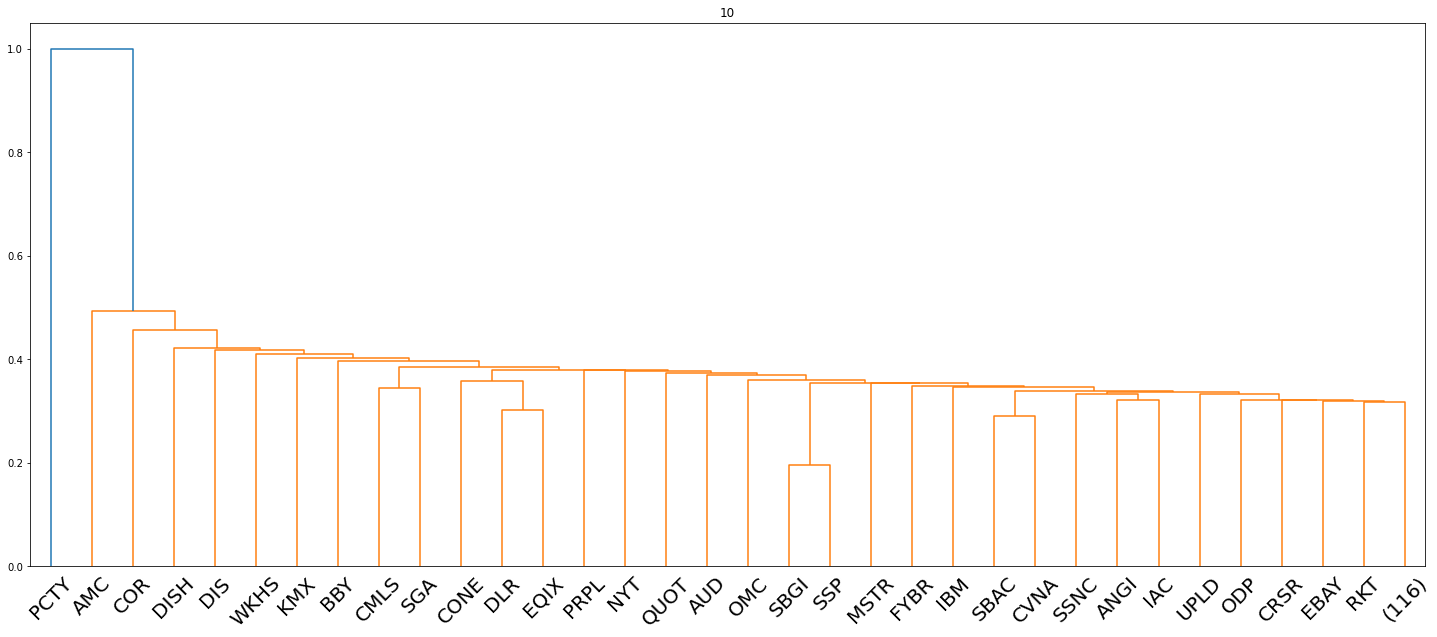

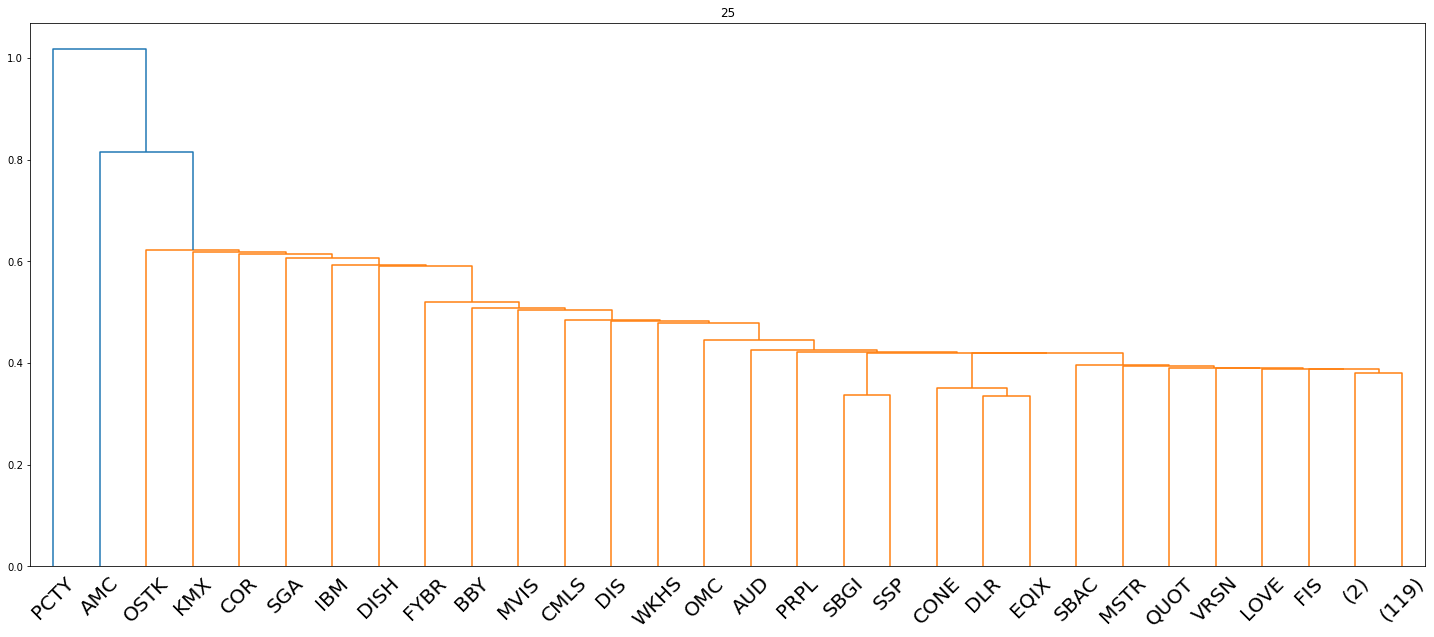

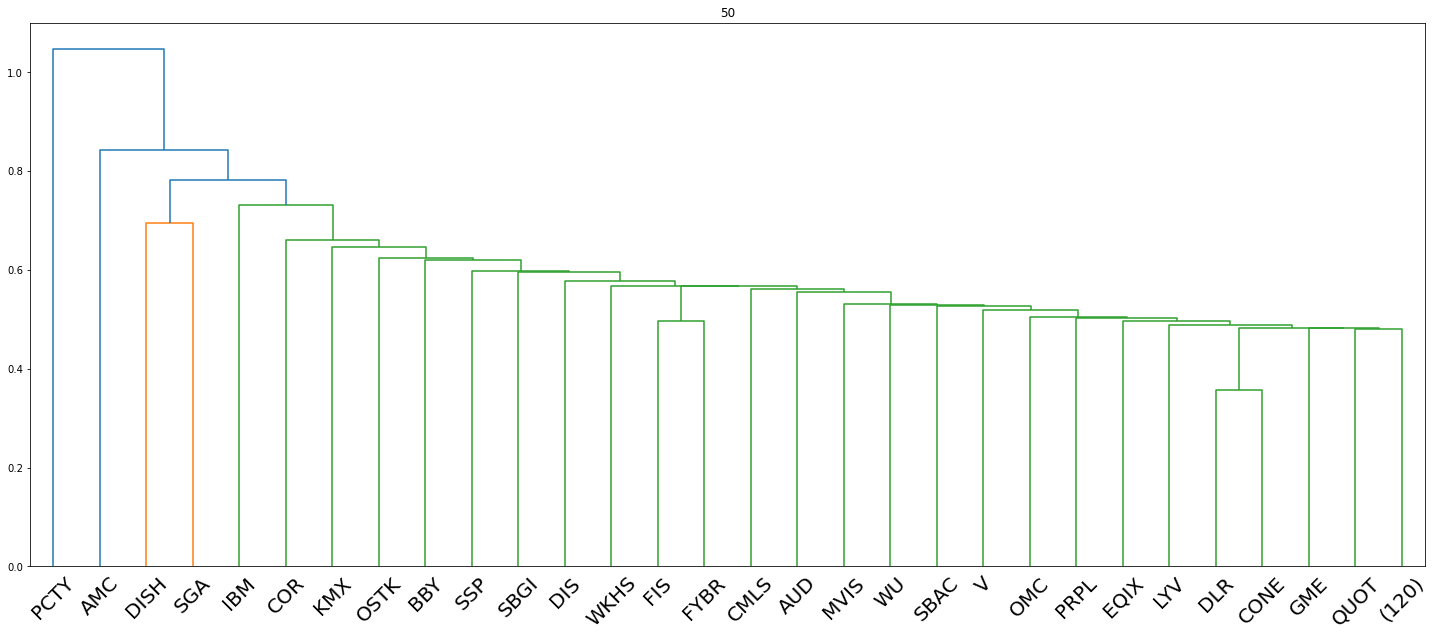

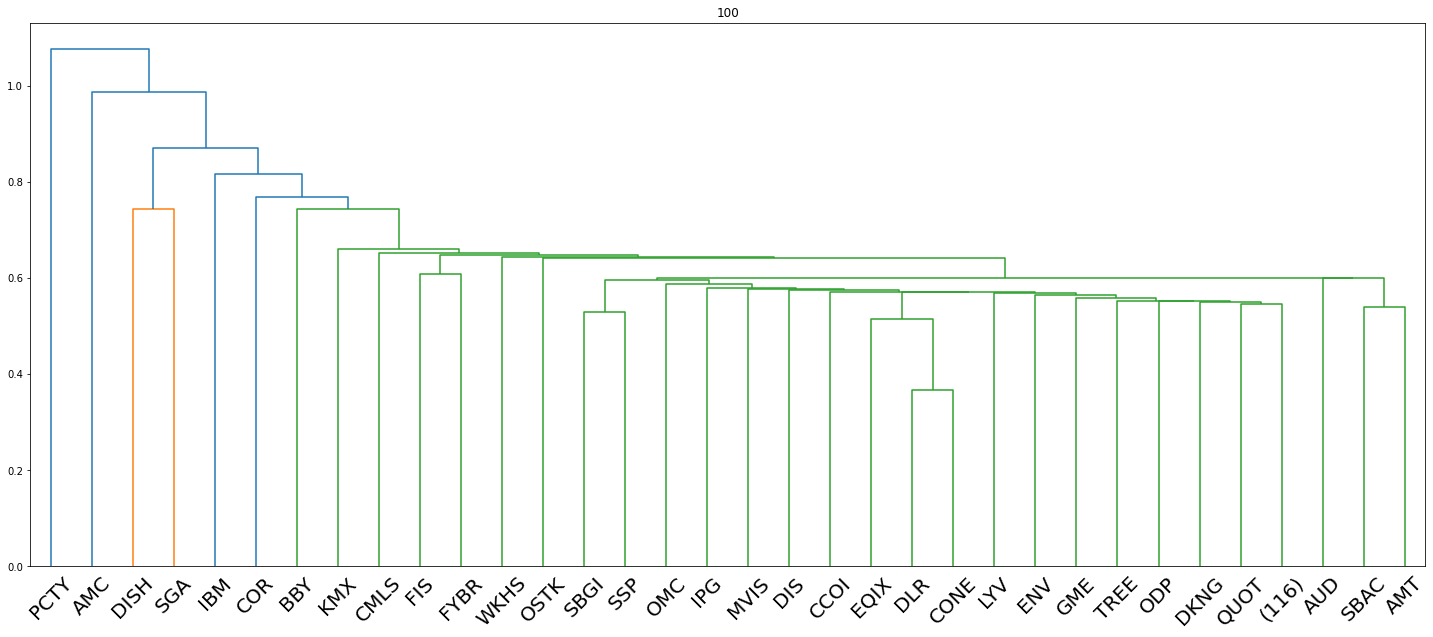

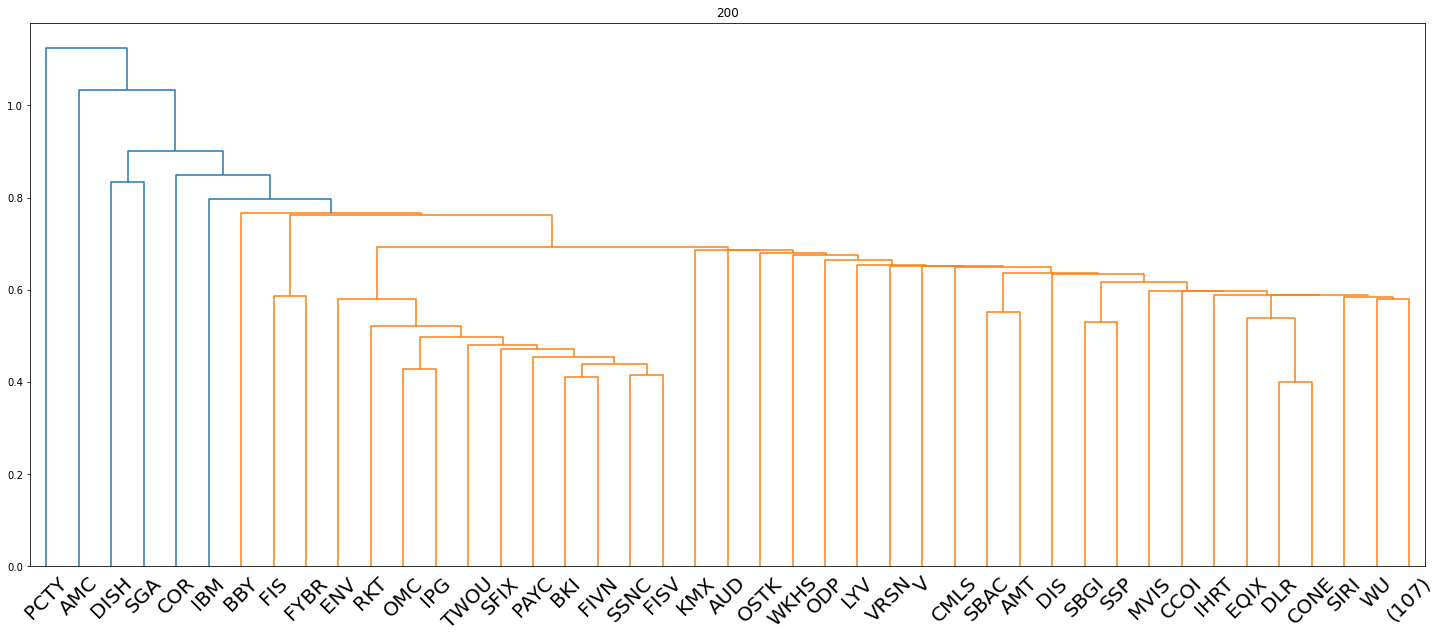

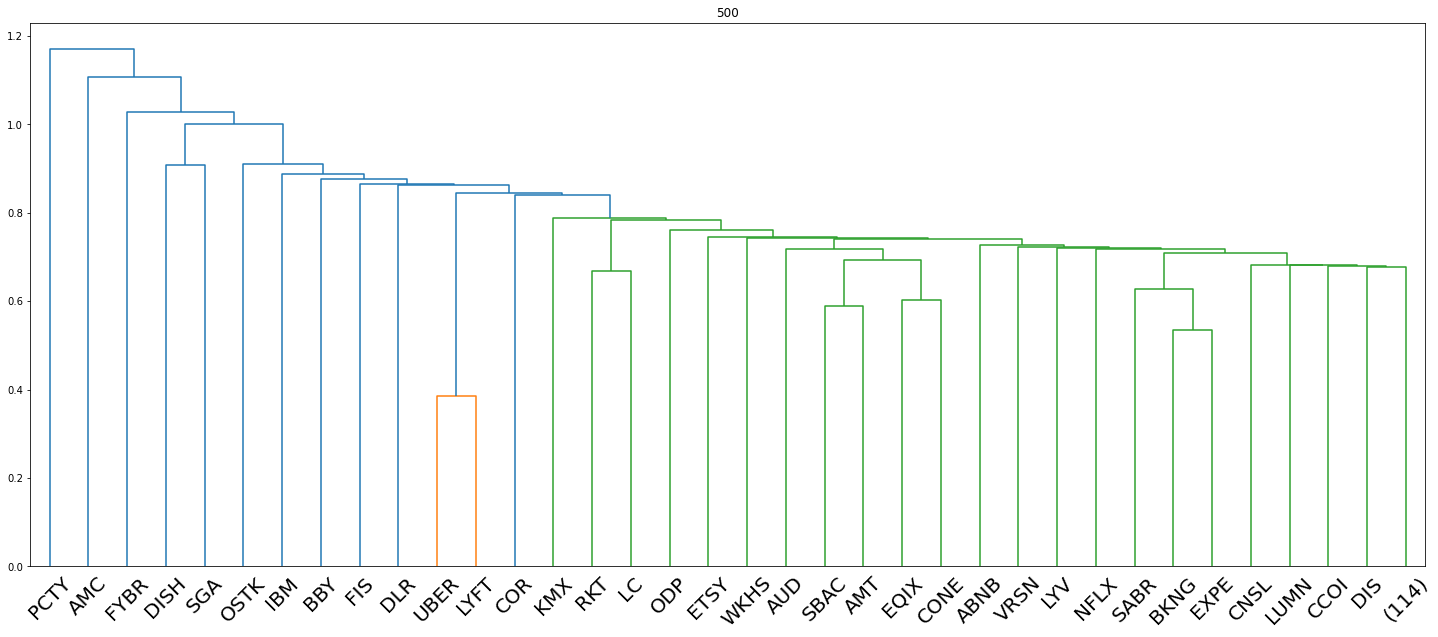

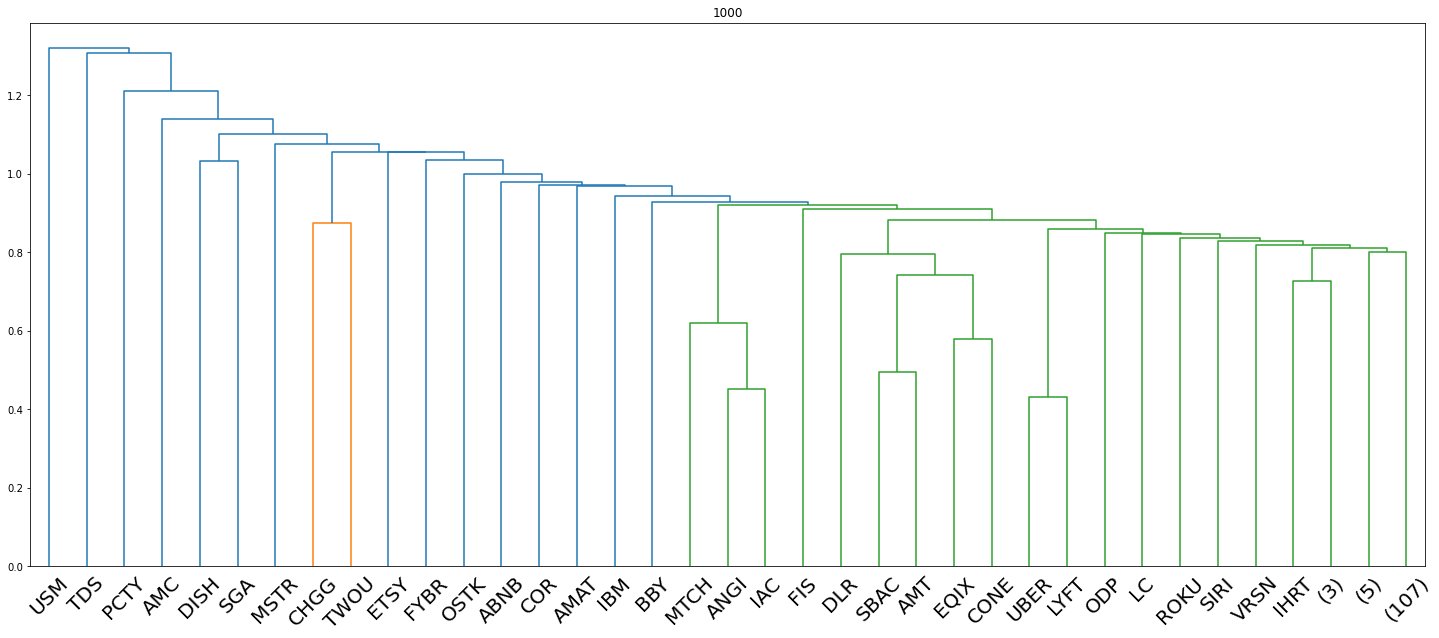

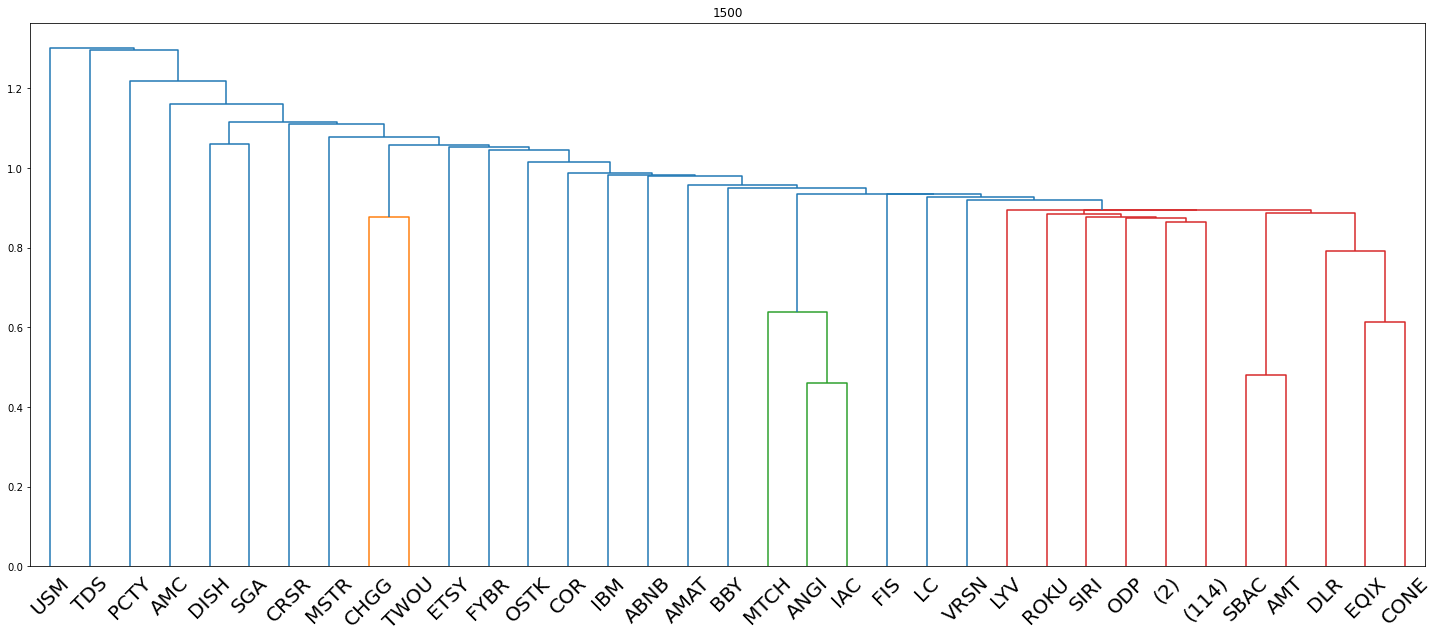

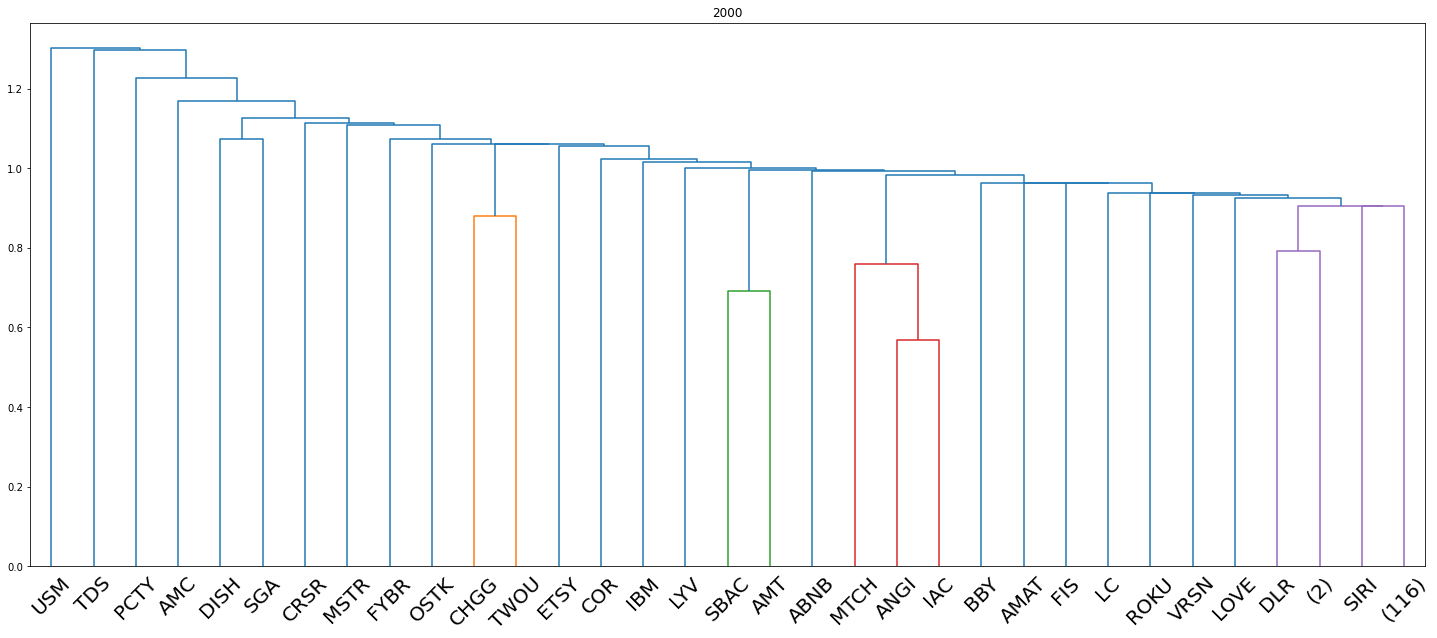

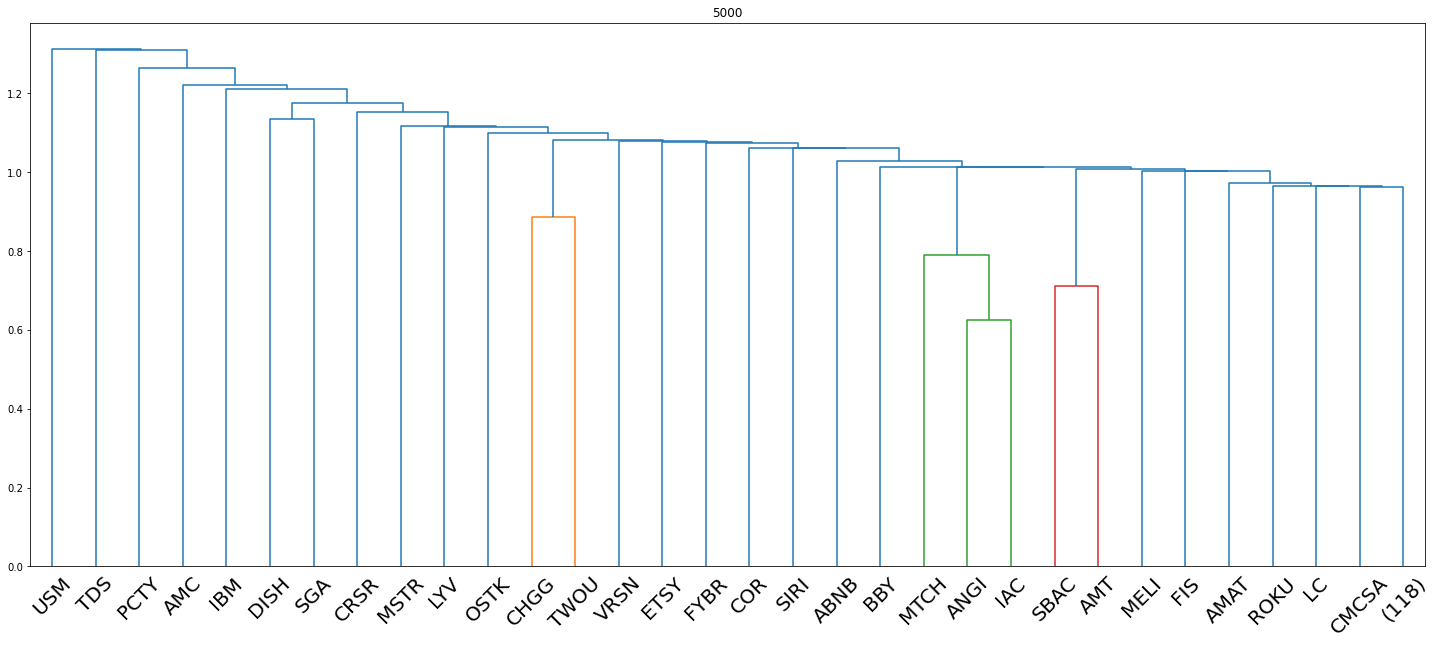

In [26]:
groupings=pd.DataFrame(index=corpus.keys(),columns=engineers.keys())
for max_ftr,engineer in engineers.items():
    X=engineer.transform(corpus.values())
    X_vect=pd.DataFrame.sparse.from_spmatrix(X)
    fig,ax=plt.subplots(figsize=(25,10));
    ax.set_title(max_ftr);
    dendrogram(
            linkage(X_vect),
            leaf_rotation=45.,
            leaf_font_size=20.,
            labels=list(corpus.keys()),
            p=25,
            truncate_mode='level'
            );
    plt.savefig(image_path+'Dendograms/2020_MaxF'+max_ftr+'.pdf',
                orientation='landscape',
                pad_inches=0.0,
                bbox_inches='tight',
                format='pdf'
               );
    
    
    Agg.fit(X.toarray())
    groupings[max_ftr]=Agg.labels_    
groupings.to_excel(parent_path+'Data/Results/Different_Max_Features.xlsx')

In [27]:
distributions=pd.DataFrame(index=range(0,20),columns=engineers.keys())
for max_feature in engineers.keys():
    distributions[max_feature]=groupings[max_feature].value_counts()

In [28]:
for feature,engineer in engineers.items():
    X=engineer.transform(corpus.values())

In [29]:
K3=KMeans(n_clusters=3)
K5=KMeans(n_clusters=5)
K8=KMeans(n_clusters=8)
K10=KMeans(n_clusters=10)
K15=KMeans(n_clusters=15)
K25=KMeans(n_clusters=25)
clusterers={'3':K3,'5':K5,'8':K8,'10':K10,'15':K15,'25':K25}

In [30]:
groupings=pd.DataFrame(index=corpus.keys(),columns=engineers.keys())
engineer=create_extractor(corpus.values(),parms)
X=engineer.transform(corpus.values())
for n,clusterer in clusterers.items():
    clusterer.fit(X.toarray())
    groupings[n]=clusterer.labels_
groupings.to_excel(parent_path+'Data/Results/KNNs.xlsx')

In [31]:
STATE=1988
Aff=AffinityPropagation(max_iter=500,random_state=STATE)
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(corpus.values(),parms)
X=engineer.transform(corpus.values())
Aff.fit(X.toarray())
Aff_Clusters=pd.DataFrame(zip(corpus.keys(),Aff.labels_),columns=['Ticker','Category'])
Aff_Clusters.to_excel(parent_path+'Data/Results/Affinity_Labels.xlsx')

In [32]:
centers=Aff.cluster_centers_indices_.tolist()
Aff_Summary=Aff_Clusters.loc[centers]
Aff_Summary.set_index(['Category'],inplace=True)
Aff_Summary['Count']=Aff_Clusters.Category.value_counts()
Aff_Summary.to_excel(parent_path+'Data/Results/Affinity_Summary.xlsx')

In [33]:
full_corpus=collect_texts_all()
corpus=collect_texts_year('2020')
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer1=create_extractor(full_corpus.values(),parms)
engineer2=create_extractor(corpus.values(),parms)
X1=engineer1.transform(corpus.values())
X2=engineer2.transform(corpus.values())
clusterer=clusterers['15']
clusterer.fit(X1.toarray())
clustering1=clusterer.labels_
clusterer.fit(X2.toarray())
clustering2=clusterer.labels_
DF=pd.DataFrame(zip(corpus.keys(),clustering1,clustering2),columns=['Ticker','Category-Full','Category-2020'])
DF.to_excel(parent_path+'Data/Results/Comp_Dictionary.xlsx')

Clustering w/ Agg.Prop...Done two ways.

In [34]:
five_years=['2020','2019','2018','2017','2016']
stocks=Filed[
            Filed['2020'] & 
            Filed['2019'] & 
            Filed['2018'] & 
            Filed['2017'] & 
            Filed['2016']
            ].index

Way 1: Cluster entire corpus simultaneously.

In [36]:
full_corpus=collect_texts_years(five_years)
corpus=collect_texts(stocks,five_years)

In [37]:
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms)
clusterer=AgglomerativeClustering(n_clusters=20)

In [38]:
X=engineer.transform(corpus.values())
clusterer.fit(X.toarray())

AgglomerativeClustering(n_clusters=20)

In [39]:
DF_All=pd.DataFrame(zip(clusterer.labels_,corpus.keys()),columns=['Group','Stock_Year'])
DF_All['Stock']=DF_All.Stock_Year.apply(lambda s:s.split('_')[0])
DF_All['Year']=DF_All.Stock_Year.apply(lambda s:s.split('_')[1])
DF_All.set_index(['Stock','Year'])
DF_All.to_excel(parent_path+'Data/Results/5Yr_Simultaneous.xlsx')

Way 2:  Split corpus into 5 parts (one for each year) prior to apply clustering.

In [40]:
DF_byYear=pd.DataFrame(columns=five_years,index=stocks)
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms)

In [42]:
for y in five_years:
    corpus=collect_texts(stocks,[y])
    X=engineer.transform(corpus.values())
    clusterer.fit(X.toarray())
    DF_byYear[y]=clusterer.labels_

In [43]:
DF_byYear.to_excel(parent_path+'Data/Results/5Yr_Annuals.xlsx')

Calculate Weightings to generate similarity matrix.

In [47]:
weights={'2020':0.3,'2019':0.2,'2018':0.2,'2017':0.15,'2016':0.15}
S=groups_to_similarity(DF_byYear,weights)
S.to_excel(parent_path+'Data/Results/5yr_Similarity.xlsx')

Second Methodology Except w/ 10 Year horizon

In [48]:
ten_years=['2020','2019','2018','2017','2016',
            '2015','2014','2013','2012','2011']
stocks=Filed[
            Filed['2020'] & 
            Filed['2019'] & 
            Filed['2018'] & 
            Filed['2017'] & 
            Filed['2016'] &
            Filed['2015'] & 
            Filed['2014'] & 
            Filed['2013'] & 
            Filed['2012'] & 
            Filed['2011']
            ].index
full_corpus=collect_texts_years(ten_years)

In [49]:
parms={'max_df':0.99,'max_features':1000,'min_df':0.01}
engineer=create_extractor(full_corpus.values(),parms)
clusterer=AgglomerativeClustering(n_clusters=20)

In [ ]:
DF_byYear=pd.DataFrame(columns=ten_years,index=stocks)
for y in ten_years:
    corpus=collect_texts(stocks,[y])
    X=engineer.transform(corpus.values())
    clusterer.fit(X.toarray())
    DF_byYear[y]=clusterer.labels_
DF_byYear.to_excel(parent_path+'Data/Results/10Yr_Annuals.xlsx')

In [ ]:
weights={'2020':0.20,'2019':0.20,'2018':0.15,'2017':0.10,'2016':0.10,
         '2015':0.05,'2014':0.05,'2013':0.05,'2012':0.05,'2011':0.05}
S=groups_to_similarity(DF_byYear,weights)
S.to_excel(parent_path+'Data/Results/10yr_Similarity.xlsx')